In [2]:
import pandas as pd
import numpy as np
import anndata as ad
from random import sample
from math import ceil
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
from SpatialDE import spatial_patterns, SpatialPatternParameters

In [48]:
# this file contains estimated genetic effects due to GxC for 8,352 pseudo-cells, 213 significant sp-eQTL
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt"
df0 = pd.read_csv(filename, sep = "\t", index_col=0)
df0.head()
df0.shape

(8352, 213)

In [64]:
eqtls = df0.columns
eqtls

Index(['ABHD10_-3_111697439_T_G', 'ABHD12B_-14_51328222_C_T',
       'ACKR2_-3_42817129_C_T', 'ADD2_-2_70894426_A_T',
       'ADSL_-22_40757228_A_C', 'AIM1L_-1_26673825_C_T',
       'AKAP7_-6_131691964_C_A', 'ALDH7A1_-5_126011412_G_A',
       'ANKRD18B_-9_33524775_C_A', 'APIP_-11_34905987_T_C',
       ...
       'YWHAE_-17_1246420_G_A', 'ZBBX_-3_167080934_T_G',
       'ZC3HAV1_-7_138730361_T_C', 'ZFR2_-19_3840157_C_T',
       'ZG16B_-16_2871121_T_C', 'ZNF423_-16_49599995_C_G',
       'ZNF552_-19_58315273_G_A', 'ZNF738_-19_21474173_G_A',
       'ZNF77_-19_2936535_G_A', 'ZP3_-7_76177284_C_T'],
      dtype='object', length=213)

In [66]:
import re
genes = [re.sub("_-.*", "", x) for x in eqtls]
# genes

In [68]:
input_files_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/input_files/"
phenotype_file = input_files_dir+"phenotype.csv"
df = pd.read_csv(phenotype_file, index_col=0)

In [69]:
df = df[df.index.isin(genes)]

In [70]:
df = df.T
df.head(2)

,SLC35E2,UTS2,TNFRSF9,CROCCP2,KIF17,LINC00339,AIM1L,EYA3,TRIT1,ITGB3BP,...,GSTT1,CRYBB2,MIAT,RFPL2,ADSL,SMDT1,FAM118A,SYCE3,RWDD2B,C21orf119
HPSI0714i-iudw_1--DA--d30--0,0.906032,0.0,0.0,1.525099,0.313520,0.615636,0.0,0.906507,0.597465,0.905692,...,0.904861,0.0,8.275477,0.0,2.410316,8.087526,0.309,0.0,0.300956,0.297723
HPSI0714i-iudw_1--DA--d30--1,0.000000,0.0,0.0,2.381568,0.389524,0.000000,0.0,0.394276,0.382071,0.389980,...,0.384619,0.0,5.593349,0.0,1.986789,5.107899,0.000,0.0,0.778171,0.388191


In [72]:
### MOFA
# pcs_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/mofa_logcounts_model_factors.csv"
pcs_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/mofa_tsne.csv"
df_pcs = pd.read_csv(pcs_filename, index_col=0)
df_pcs.head()
# df_pcs.index

,tSNE1,tSNE2,condition
HPSI0714i-iudw_1--DA--d30--0,-13.756691,32.711906,d30
HPSI0714i-iudw_1--DA--d30--1,4.620292,31.437191,d30
HPSI0714i-iudw_1--DA--d30--2,-0.272890,38.266757,d30
HPSI0714i-iudw_1--DA--d30--3,-8.273758,33.398629,d30
HPSI0714i-iudw_1--DA--d30--4,29.712093,20.151987,d30


In [73]:
# tSNE coordinates for 9,219 pseudocells
df_pcs.shape

(9219, 3)

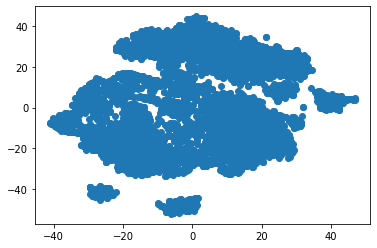

In [74]:
plt.scatter(df_pcs.values[:,0],df_pcs.values[:,1])
plt.show()

In [75]:
## consider only shared cells

In [76]:
all_cells = df_pcs.index.values

In [77]:
all_cells

array(['HPSI0714i-iudw_1--DA--d30--0', 'HPSI0714i-iudw_1--DA--d30--1',
       'HPSI0714i-iudw_1--DA--d30--2', ...,
       'HPSI0114i-rozh_4--DA--d52_tr--10',
       'HPSI0114i-rozh_4--DA--d52_tr--11',
       'HPSI0114i-rozh_4--DA--d52_tr--12'], dtype=object)

In [78]:
cells = sample(list(all_cells), k = ceil(len(all_cells)*1))
cells = sorted(set(list(df.index.values)).intersection(cells))

In [79]:
df.index

Index(['HPSI0714i-iudw_1--DA--d30--0', 'HPSI0714i-iudw_1--DA--d30--1',
       'HPSI0714i-iudw_1--DA--d30--2', 'HPSI0714i-iudw_1--DA--d30--3',
       'HPSI0714i-iudw_1--DA--d30--4', 'HPSI0714i-iudw_1--DA--d30--5',
       'HPSI0714i-iudw_1--DA--d30--6', 'HPSI0714i-iudw_1--DA--d30--7',
       'HPSI0714i-iudw_1--DA--d30--8', 'HPSI0714i-iudw_1--DA--d30--9',
       ...
       'HPSI0114i-rozh_4--DA--d52_tr--3', 'HPSI0114i-rozh_4--DA--d52_tr--4',
       'HPSI0114i-rozh_4--DA--d52_tr--5', 'HPSI0114i-rozh_4--DA--d52_tr--6',
       'HPSI0114i-rozh_4--DA--d52_tr--7', 'HPSI0114i-rozh_4--DA--d52_tr--8',
       'HPSI0114i-rozh_4--DA--d52_tr--9', 'HPSI0114i-rozh_4--DA--d52_tr--10',
       'HPSI0114i-rozh_4--DA--d52_tr--11', 'HPSI0114i-rozh_4--DA--d52_tr--12'],
      dtype='object', length=9219)

In [80]:
df = df[df.index.isin(cells)]
df.shape

(9219, 213)

In [81]:
df_pcs = df_pcs[df_pcs.index.isin(cells)]
df_pcs.shape

(9219, 3)

In [82]:
# sort to ensure cells are in the same order
df = df.sort_index(axis=0)
df_pcs = df_pcs.sort_index(axis=0)

In [83]:
# scale values
mat = minmax_scale(df)
df = pd.DataFrame(data = mat, index = df.index, columns = df.columns)

In [84]:
df.head()

,SLC35E2,UTS2,TNFRSF9,CROCCP2,KIF17,LINC00339,AIM1L,EYA3,TRIT1,ITGB3BP,...,GSTT1,CRYBB2,MIAT,RFPL2,ADSL,SMDT1,FAM118A,SYCE3,RWDD2B,C21orf119
HPSI0114i-bezi_3--DA--d30--0,0.118517,0.0,0.0,0.341564,0.0,0.000000,0.000000,0.000000,0.340489,0.202671,...,0.000000,0.0,0.875584,0.0,0.113457,0.652129,0.000000,0.0,0.000000,0.000000
HPSI0114i-bezi_3--DA--d30--1,0.120812,0.0,0.0,0.113789,0.0,0.000000,0.000000,0.117463,0.227211,0.000000,...,0.000000,0.0,0.760499,0.0,0.206455,0.795330,0.000000,0.0,0.000000,0.000000
HPSI0114i-bezi_3--DA--d30--10,0.176594,0.0,0.0,0.751212,0.0,0.000000,0.156166,0.000000,0.000000,0.128627,...,0.000000,0.0,0.768574,0.0,0.129800,0.576546,0.144753,0.0,0.143669,0.147573
HPSI0114i-bezi_3--DA--d30--11,0.191110,0.0,0.0,0.000000,0.0,0.190494,0.000000,0.000000,0.000000,0.000000,...,0.171995,0.0,0.874541,0.0,0.327755,0.597310,0.000000,0.0,0.000000,0.000000
HPSI0114i-bezi_3--DA--d30--12,0.197314,0.0,0.0,0.182888,0.0,0.193856,0.000000,0.000000,0.182824,0.000000,...,0.342395,0.0,0.859444,0.0,0.497743,0.800799,0.000000,0.0,0.182560,0.000000


In [85]:
### save scaled data

In [86]:
# delect columns that are only 0s
df = df.loc[:, (df != 0).any(axis=0)]

In [87]:
### build "fake" AnnData file
#
# counts: single-cell eQTL effects
# adata.obsm['spatial']: coordinates (PCA, UMAP..)

In [88]:
# obs i.e. cells
obs_names = df.index.values
obs = pd.DataFrame(index=obs_names)
# obs
n_obs = len(obs)
n_obs

9219

In [89]:
# vars i.e. genes (or in this case gene-SNP pairs)
var_names = df.columns.values
var = pd.DataFrame(index=var_names)
# var
n_vars = len(var)
n_vars

213

In [90]:
X = df.to_numpy()
X.shape
type(X)

numpy.ndarray

In [91]:
adata = ad.AnnData(X=X, obs=obs, var=var, dtype='float')
adata

AnnData object with n_obs × n_vars = 9219 × 213

In [92]:
## add PCs as "spatial" coordinates
adata.obsm['spatial'] = df_pcs.values[:,0:2]
adata.obsm['spatial'].shape

(9219, 2)

In [93]:
adata

AnnData object with n_obs × n_vars = 9219 × 213
    obsm: 'spatial'

In [94]:
sp = spatial_patterns(adata, normalized = True, params=SpatialPatternParameters(lengthscales=5))

In [95]:
d = np.concatenate([sp[0].labels.reshape(len(sp[0].labels),1),
                    adata.var.index.to_numpy().reshape(len(sp[0].labels),1)], axis=1)
df_labels = pd.DataFrame(data = d, columns = ["label","gene"])
df_labels.head()

,label,gene
0,12,SLC35E2
1,12,UTS2
2,12,TNFRSF9
3,12,CROCCP2
4,12,KIF17


In [96]:
df_pp = pd.DataFrame(data = sp[0].pattern_probabilities, columns = ["pp"+str(i) for i in np.arange(len(np.unique(sp[0].labels)))])
df_pp.head()

,pp0,pp1,pp2,pp3,pp4,pp5,pp6,pp7,pp8,pp9,pp10,pp11,pp12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [97]:
df_cluster_summaries = pd.DataFrame(data = sp[0].patterns, index=df_pcs.index)
df_cluster_summaries.head()
# df_cluster_summaries.shape

,0,1,2,3,4,5,6,7,8,9,10,11,12
HPSI0114i-bezi_3--DA--d30--0,-0.350016,0.049183,-0.082112,-0.293013,-0.541121,-0.218577,0.083752,0.014316,0.227960,0.079944,-0.005389,0.371301,-0.101760
HPSI0114i-bezi_3--DA--d30--1,-0.371178,-0.005808,-0.016108,-0.220075,-0.578124,-0.234184,0.169015,0.034785,0.279104,0.212434,0.000034,0.377613,-0.132571
HPSI0114i-bezi_3--DA--d30--10,-0.324368,0.102722,0.174749,-0.184039,-0.507709,-0.236843,0.231279,0.161047,0.496166,0.020215,0.161098,0.570225,-0.006822
HPSI0114i-bezi_3--DA--d30--11,-0.358460,-0.029247,-0.111002,-0.212597,-0.503663,-0.223123,0.081921,-0.005126,0.092028,0.245966,-0.015143,0.291606,-0.105677
HPSI0114i-bezi_3--DA--d30--12,-0.356806,-0.036342,-0.105386,-0.198862,-0.489516,-0.221608,0.078277,-0.001233,0.072516,0.265554,-0.007293,0.284476,-0.098538


In [98]:
df_cluster_summaries.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/expression_20mofas_as_spatial_cluster_summaries.csv")

In [99]:
df_clusters = pd.concat([df_labels, df_pp], axis = 1)
df_clusters.head()

,label,gene,pp0,pp1,pp2,pp3,pp4,pp5,pp6,pp7,pp8,pp9,pp10,pp11,pp12
0,12,SLC35E2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,12,UTS2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,12,TNFRSF9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12,CROCCP2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,12,KIF17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [100]:
df_clusters.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/expression_20mofas_as_spatial_cluster_labels.csv")

In [101]:
# df_clusters[df_clusters["gene"]=="ENSG00000137331_IER3-6_30639412_A_G"]

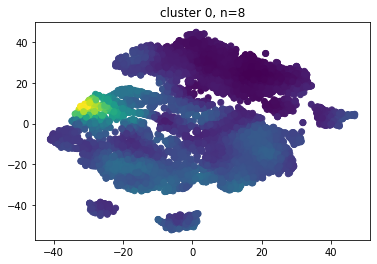

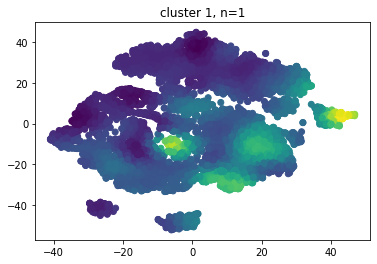

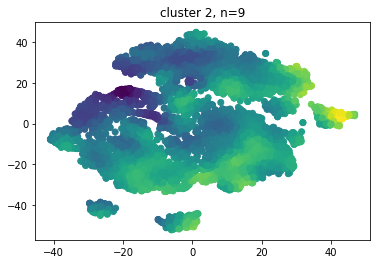

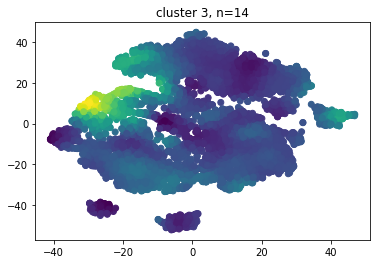

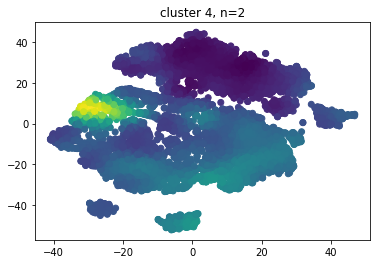

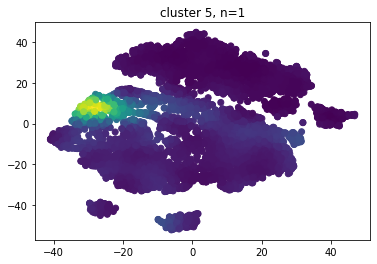

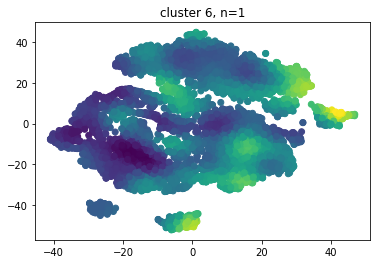

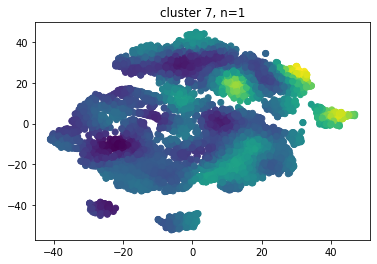

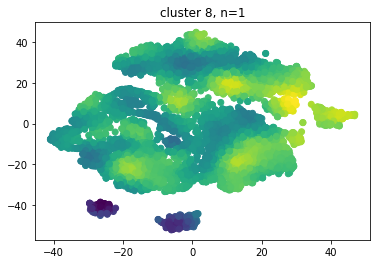

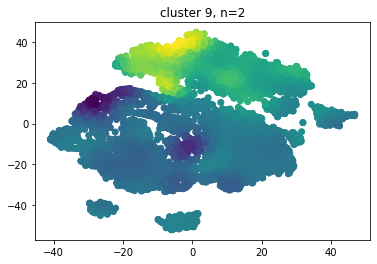

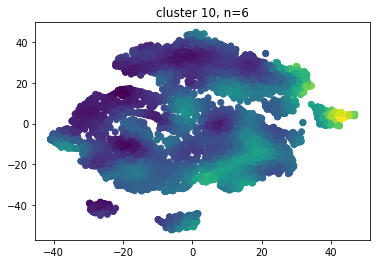

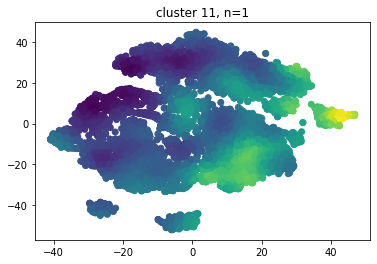

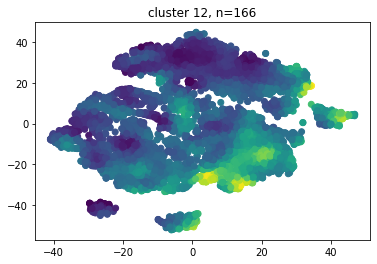

In [102]:
for i in np.arange(sp[0].patterns.shape[1]):
    plt.scatter(df_pcs.values[:,0],df_pcs.values[:,1], c = sp[0].patterns[:,i])
    plt.title("cluster "+str(i)+", n="+str(df_clusters[df_clusters["label"] == i].shape[0]))
    plt.show()